<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab4/Lab4_2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 4 - PART 2 Multi Layers Perceptron**

<font color="Orange">**NOTE**</font> : In this lab, you will need to use PyTorch. Please refer to the PyTorch documentation for installation instructions: https://pytorch.org.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Create Sine dataset with 9 sampling point as a activity sheet.<br>
Then, plot the dataset.


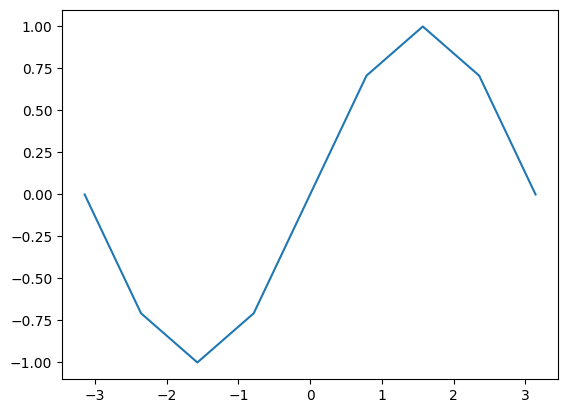

In [ ]:
### START CODE HERE ###
x = np.linspace(-np.pi, np.pi, 9)
y = np.sin(x)

dataset = [[x_val,y_val] for x_val,y_val in zip(x,y)]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()
### END CODE HERE ###

**Define the Multi Layers Perceptron class using pytorch.**<br>
Using `nn.Linear()` and `nn.ReLU()`



In [ ]:
### START CODE HERE ###
class MLP(nn.Module):
    def __init__(self, input_size=1, hidden_size=2, output_size=1):
        """
        Multi-Layer Perceptron (MLP) class.

        Args:
            input_size (int): The size of the input layer.
            hidden_size (int): The size of the hidden layer.
            output_size (int): The size of the output layer.
        """
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the MLP.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            in_fc1: This represents the input to the first fully connected layer (fc1). It is obtained by passing the input tensor x through the fc1 layer.

            fc1_x: This represents the output of the first fully connected layer (fc1) after applying the ReLU activation function. It is obtained by passing in_fc1 through the ReLU activation function.

            in_fc2: This represents the input to the second fully connected layer (fc2). It is obtained by passing fc1_x through the fc2 layer.

            fc2_x: This represents the output of the second fully connected layer (fc2) after applying the ReLU activation function. It is obtained by passing in_fc2 through the ReLU activation function.

            out: This represents the final output of the MLP model. It is obtained by passing fc2_x through the third fully connected layer (fc3).
        """
        in_fc1 = self.fc1(x)
        fc1_x = self.relu(in_fc1)
        in_fc2 = self.fc2(fc1_x)
        fc2_x = self.relu(in_fc2)
        out = self.fc3(fc2_x)
        return in_fc1, fc1_x, in_fc2, fc2_x, out

mlp = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.008)
print(mlp)
### END CODE HERE ###

MLP(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


**Load the initial model's weights that given in Lab Direction sheet.**<br>
please refer to this https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
### START CODE HERE ###
model_sate_dict = OrderedDict()
model_sate_dict['fc1.weight'] = torch.tensor([[0.9590], [-0.6742]])
model_sate_dict['fc1.bias'] = torch.tensor([-0.3777, 0.0178])
model_sate_dict['fc2.weight'] = torch.tensor([[-0.3664, 0.3738],[0.5779, 0.1787]])
model_sate_dict['fc2.bias'] = torch.tensor([-0.3471, 0.1519])
model_sate_dict['fc3.weight'] = torch.tensor([[0.5198, -0.0354]])
model_sate_dict['fc3.bias'] = torch.tensor([0.4454])
mlp.load_state_dict(model_sate_dict)
### END CODE HERE ###

<All keys matched successfully>

**Try to plot the output from each layers of weight loaded MLP**

In [ ]:
output_dict = {'in_fc1': [], 'fc1_x': [], 'in_fc2': [], 'fc2_x': [], 'out': []}
### START CODE HERE ###
dataset_tensor = torch.tensor(dataset).float()

in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:,0].unsqueeze(1))
output_dict['in_fc1'].append(in_fc1.detach().numpy())
output_dict['fc1_x'].append(fc1_x.detach().numpy())
output_dict['in_fc2'].append(in_fc2.detach().numpy())
output_dict['fc2_x'].append(fc2_x.detach().numpy())
output_dict['out'].append(out.detach().numpy())

### END CODE HERE ###

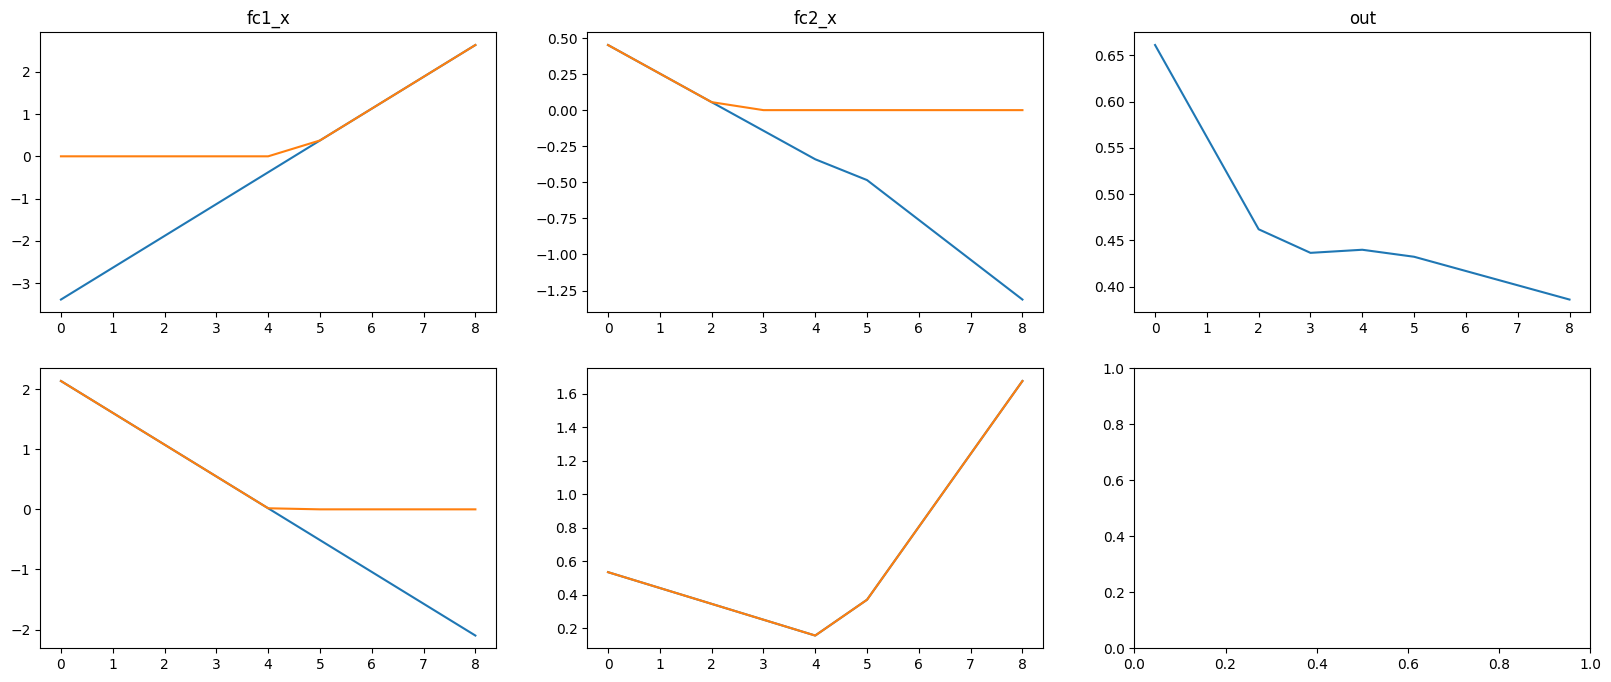

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20,8))

ax[0,0].plot(output_dict['in_fc1'][0][:,0])
ax[0,0].plot(output_dict['fc1_x'][0][:,0])
ax[0,0].set_title('fc1_x')

ax[1,0].plot(output_dict['in_fc1'][0][:,1])
ax[1,0].plot(output_dict['fc1_x'][0][:,1])

ax[0,1].plot(output_dict['in_fc2'][0][:,0])
ax[0,1].plot(output_dict['fc2_x'][0][:,0])
ax[0,1].set_title('fc2_x')

ax[1,1].plot(output_dict['in_fc2'][0][:,1])
ax[1,1].plot(output_dict['fc2_x'][0][:,1])

ax[0,2].plot(output_dict['out'][0][:,0])
ax[0,2].set_title('out')

plt.show()

**Train the MLP for n Epochs.**<br>
In the final part, you will need to save a GIF that animates how the output of each layer (similar to cell above) changes during the training loops.

In [ ]:
output_dict = {'in_fc1': [], 'fc1_x': [], 'in_fc2': [], 'fc2_x': [], 'out': []}
### START CODE HERE ###
num_epochs = 20000
log_interval = 10000
frame = []
input = dataset_tensor[:,0].unsqueeze(1)
y_real = dataset_tensor[:,1].unsqueeze(1)
for epoch in range(num_epochs):

  in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(input)
  output_dict['in_fc1'].append(in_fc1.detach().numpy())
  output_dict['fc1_x'].append(fc1_x.detach().numpy())
  output_dict['in_fc2'].append(in_fc2.detach().numpy())
  output_dict['fc2_x'].append(fc2_x.detach().numpy())
  output_dict['out'].append(out.detach().numpy())

  loss = criterion(out, y_real)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % log_interval == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
      frame.append(output_dict)
      output_dict = {'in_fc1': [], 'fc1_x': [], 'in_fc2': [], 'fc2_x': [], 'out': []}



# print(frame)
### END CODE HERE ###

Epoch [10000/20000], Loss: 0.0060441200621426105
Epoch [20000/20000], Loss: 0.003314771456643939


**Plot the final output compare to the original dataset.**

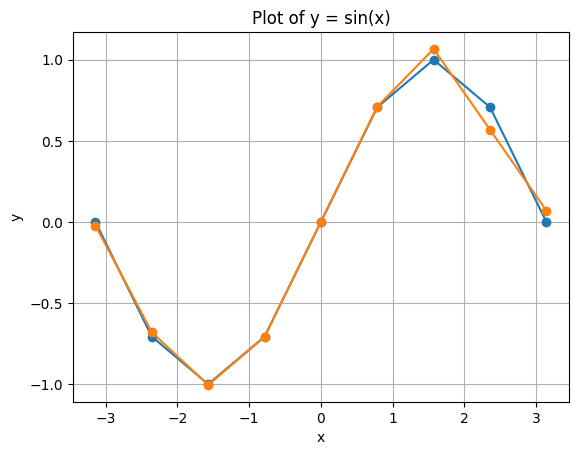

In [ ]:
### START CODE HERE ###
y_pred = frame[-1]['out'][-1]
plt.plot(x, y, marker='o', linestyle='-')
plt.plot(x, y_pred, marker='o', linestyle='-')
plt.title('Plot of y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
### END CODE HERE ###

**Save a GIF that animates how the output of each layer changes during the training loops**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.003314771875176102


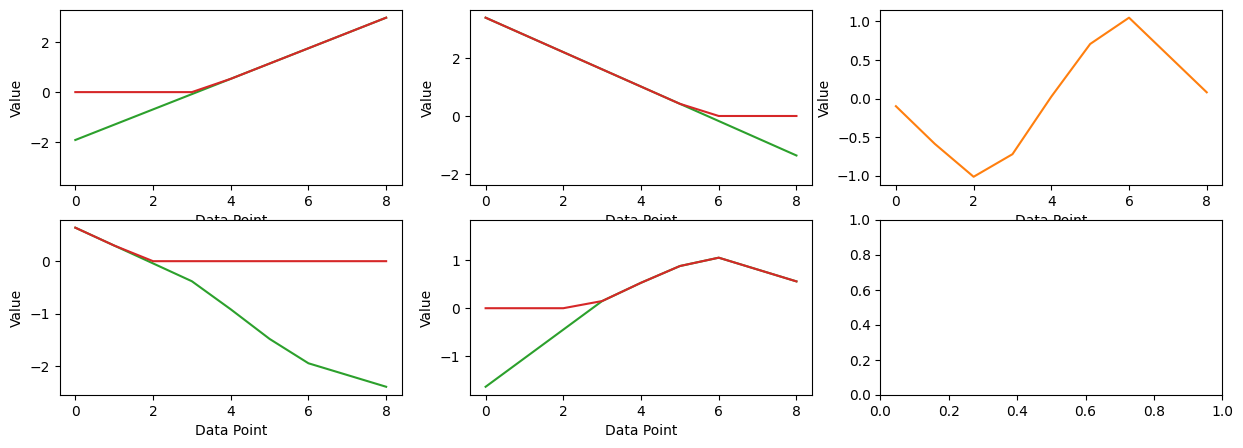

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig, axs = plt.subplots(2, 3, figsize=(15, 5))
ims = []
num = 0
for f in frame:
    im = []

    # Plot for Layer-1, Node-1
    ax = axs[0, 0]
    line1, = ax.plot(f['in_fc1'][0][:, 0])
    line2, = ax.plot(f['fc1_x'][0][:, 0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-1, Node-2
    ax = axs[0, 1]
    line1, = ax.plot(f['in_fc1'][0][:, 1])
    line2, = ax.plot(f['fc1_x'][0][:, 1])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-2, Node-1
    ax = axs[1, 0]
    line1, = ax.plot(f['in_fc2'][0][:, 0])
    line2, = ax.plot(f['fc2_x'][0][:, 0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-2, Node-2
    ax = axs[1, 1]
    line1, = ax.plot(f['in_fc2'][0][:, 1])
    line2, = ax.plot(f['fc2_x'][0][:, 1])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Output
    ax = axs[0, 2]
    line1, = ax.plot(f['out'][0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1])

    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True)
ani_js = ani.to_jshtml()

HTML(ani_js)


### Question
1. Calculate and describe a comparison of Mean Square Error (MSE) values between y_predict and y_real.
2. From the Node_result graphs, identify if there is any Node that changes the sign of the weight (slope) from the initial starting weight.
3. Does increasing the number of epochs to 80,000 or increasing/decreasing the learning_rate help reduce the MSE?
4. If the initial weights are changed as specified below, do they affect the number of training epoches and the final results (y_predict)? If there is an impact, Explain.
    model_sate_dict['fc1.weight'] -> [[0.1], [0.1]]
    model_sate_dict['fc1.bias'] -> [-0.1, 0.9]
    model_sate_dict['fc2.weight'] -> [[0.51, -0.1], [-0.5, 0.5]]
    model_sate_dict['fc2.bias'] -> [-0.45,0.1]
    model_sate_dict['fc3.weight'] -> [[-1.5, -0.8]]
    model_sate_dict['fc3.bias'] -> [0.5]